In [941]:
# 1. Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from dotenv import load_dotenv
import os

# Carregar variáveis de ambiente (.env)
load_dotenv()


True

**Row ID (ID da Linha)** – Um número que indica a posição da linha. Esta coluna é dispensável, já que iremos trabalhar com o índice do DataFrame.

**Order ID (ID da Encomenda)** – Um código que identifica a encomenda. Este valor não é único, pois cada linha do DataFrame refere-se a um produto. Assim, podemos ter várias linhas com o mesmo Order ID, representando diferentes produtos comprados na mesma encomenda.

**Order Date (Data da Encomenda)** – Data em que a encomenda foi realizada.

**Ship Date (Data de Envio)** – Data em que a encomenda foi enviada para entrega.

**Ship Mode (Modo de Envio)** – Esta coluna indica o tipo de entrega utilizado para a encomenda: Second Class (segunda classe), Standard Class (classe padrão), First Class (primeira classe) e Same Day (entrega no mesmo dia).

**Customer ID (ID do Cliente)** – Identificador único de cada cliente. Este valor deverá ser único?

**Customer Name (Nome do Cliente)** – Nome do cliente.

**Segment (Segmento)** – Segmento ao qual o cliente pertence. Pode ser Consumer (consumidor final), Corporate (corporativo) ou Home Office (escritório doméstico), distinguindo entre compras pessoais, empresariais ou para escritório em casa.

**Country (País)** – País do cliente. Neste caso, apenas os Estados Unidos estão presentes, ou seja, este e-commerce actua apenas a nível nacional.

**City (Cidade)** – Cidade do cliente.

**State (Estado)** – Estado norte-americano onde se encontra o cliente.

**Postal Code (Código Postal)** – Código postal do cliente.

**Region (Região)** – Região dos Estados Unidos em que o cliente se encontra. Está dividida em South (Sul), West (Oeste), Central (Centro) e East (Este).

**Product ID (ID do Produto)** – Identificador do produto. Este valor deverá ser único?

**Category (Categoria)** – Categoria principal do produto, dividida em Furniture (Mobiliário), Office Supplies (Material de Escritório) e Technology (Tecnologia).

**Sub-Category (Subcategoria)** – Classificação mais específica dos produtos, incluindo: Bookcases (Estantes), Chairs (Cadeiras), Labels (Etiquetas), Tables (Mesas), Storage (Armazenamento), Furnishings (Artigos de Fixação), Art (Materiais artísticos como canetas e marcadores), Phones (Telefones), Binders (Dossiers), Appliances (Eletrodomésticos), Paper (Papel), Accessories (Acessórios), Envelopes (Envelopes), Fasteners (Fixadores), Supplies (Suprimentos), Machines (Máquinas) e Copiers (Fotocopiadoras).

**Product Name (Nome do Produto)** – Nome do produto.

**Sales (Valor da Encomenda)** – Valor total da venda em dólares.

**Quantity (Quantidade)** – Quantidade de unidades do produto na encomenda.

**Discount (Desconto)** – Percentagem de desconto aplicada ao pedido.

**Profit (Lucro)** – Lucro obtido com a venda do produto.



In [942]:
# caminho para o seu arquivo .xls
caminho_arquivo = 'C:/Users/lagma/Desktop/projetos/Projeto_Vendas/data/US_Superstore_data.xls'

# Carrega o arquivo Excel para um DataFrame
df = pd.read_excel(caminho_arquivo)


In [943]:
# Exibe as primeiras linhas para verificar se a importação foi correta
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [944]:
# Visão geral do dataset
print(f"O Data Frame tem {df.shape[0]} linhas e {df.shape[1]} colunas")


O Data Frame tem 9994 linhas e 21 colunas


#### Valores Distintos por Coluna

In [945]:
df["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [946]:
df["Segment"].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [947]:
df["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [948]:
df["Region"].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [949]:
df["Country"].unique()

array(['United States'], dtype=object)

In [950]:
df["Sub-Category"].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)


O e-commerce direciona-se especificamente ao mercado de equipamento, mobiliário e eletrodomésticos para escritórios. Mostra uma estratégia de segmentação de mercado focada nas necessidades de empresas e profissionais.

Apesar de operar em todo o território dos Estados Unidos (U.S.A.), o e-commerce não regista qualquer pedido proveniente de fora do país no período analisado.

#### Limpeza dos dados

In [951]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [952]:
# Verificar se existem dados nulos 
nulos = df.isnull().sum()

# Imprimir o número de valores nulos 
print(f"Número de valores nulos por coluna:\n{nulos}")

# Verificar se existem valores nulos no DataFrame no geral
if nulos.sum() > 0:
    print("\nAVISO: Existem valores nulos no DataFrame.")
    # Opcional: Imprimir as colunas com valores nulos de forma mais legível
    colunas_com_nulos = nulos[nulos > 0].index.tolist()
    print(f"Colunas com valores nulos: {', '.join(colunas_com_nulos)}")  # Lista as colunas
else:
    print("\nNão existem valores nulos no DataFrame.")



Número de valores nulos por coluna:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Não existem valores nulos no DataFrame.


In [953]:
# Verificar a existência de dados duplicados
duplicados = df.duplicated().sum()

# Imprimir o número de valores duplicados 
print(f"Número de valores duplicados : {duplicados}")


Número de valores duplicados : 0


In [954]:
df[df.duplicated()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [955]:
df.loc[df["Quantity"] == 0]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [956]:
df.loc[df["Sales"] == 0]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [957]:
Group_nome_client=df.groupby(df["Customer Name"], as_index=False)["Customer ID"].nunique()
Group_nome_client

,Customer Name,Customer ID
0,Aaron Bergman,1
1,Aaron Hawkins,1
2,Aaron Smayling,1
3,Adam Bellavance,1
4,Adam Hart,1
...,...,...
788,Xylona Preis,1
789,Yana Sorensen,1
790,Yoseph Carroll,1
791,Zuschuss Carroll,1


In [958]:
Group_nome_client.loc[Group_nome_client["Customer ID"] > 1]

,Customer Name,Customer ID


In [959]:
df.drop(columns=['Row ID'], inplace=True)

# Imprime as primeiras linhas para confirmar a remoção
print(df.head())

         Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Category Sub-Category  \
0        42420  South  FUR-BO-10001798

In [960]:
df["Tempo de Envio"] = df["Ship Date"] - df["Order Date"]

df.head(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Tempo de Envio
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3 days
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3 days
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4 days
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7 days
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7 days


In [961]:
# Calcular o tempo de envio máximo e mínimo de envio
tempo_envio_maximo = df["Tempo de Envio"].max()
tempo_envio_minimo = df["Tempo de Envio"].min()

print(f"O tempo de envio máximo é: {tempo_envio_maximo}")
print(f"O tempo de envio mínimo é: {tempo_envio_minimo}")

O tempo de envio máximo é: 7 days 00:00:00
O tempo de envio mínimo é: 0 days 00:00:00


In [962]:
# Calcular a mediana do tempo de envio
mediana_tempo_envio = df["Tempo de Envio"].median()

print(f"A mediana do tempo de envio é: {mediana_tempo_envio}")

A mediana do tempo de envio é: 4 days 00:00:00


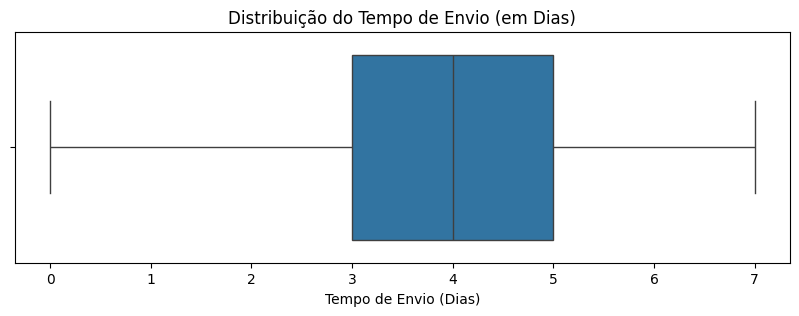

In [963]:
# Extrair o número de dias do timedelta (Duração/Intervalo de Tempo)
tempo_envio_em_dias = df["Tempo de Envio"].dt.days

# Criar a figura e o axes (eixos)
plt.figure(figsize=(10, 3))

# Criar o boxplot usando seaborn 
sns.boxplot(x=tempo_envio_em_dias)

# Adicionar um título ao gráfico
plt.title("Distribuição do Tempo de Envio (em Dias)")

# Adicionar um rótulo ao eixo x 
plt.xlabel("Tempo de Envio (Dias)")

# Mostrar o gráfico
plt.show()



Os dados de tempo de envio demonstram uma operação logística relativamente eficiente e consistente, com a maioria dos pedidos a serem enviados entre 3 e 5 dias após a sua realização. A ausência de outliers e valores negativos reforça a validade e integridade dos dados. No entanto, a variação entre o envio no mesmo dia e o envio em até 7 dias sugere áreas para investigação e possível otimização do processo logístico.

In [964]:
print(f'Quantidade de ID de produtos: {len(df["Product ID"].unique())}')
print(f'Quantidade de produtos únicos: {len(df["Product Name"].unique())}')

Quantidade de ID de produtos: 1862
Quantidade de produtos únicos: 1850


A análise revelou uma discrepância interessante: existe um número maior de IDs de produtos do que nomes de produtos distintos.
Que conclusóes podemos tirar desta observação?
É comum encontrar produtos com o mesmo nome, mas com IDs diferentes. Não é considerado um erro porque pode  acontecer por várias razões,  tais como:

Tamanho diferente ( tamanhos S, M, L)

Cor diferente (ex: azul, vermelho, verde)

Pequenas diferenças técnicas (ex: um monitor com resoluções diferentes)

Lotes de produção distintos (cada lote pode ter um ID único para rastreamento)

In [965]:
Group_nome_prod=df.groupby(df["Product Name"], as_index=False)["Product ID"].nunique()
Group_nome_prod

,Product Name,Product ID
0,"""While you Were Out"" Message Book, One Form pe...",1
1,"#10 Gummed Flap White Envelopes, 100/Box",1
2,#10 Self-Seal White Envelopes,1
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",1
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",2
...,...,...
1845,iKross Bluetooth Portable Keyboard + Cell Phon...,1
1846,iOttie HLCRIO102 Car Mount,1
1847,iOttie XL Car Mount,1
1848,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,1


In [966]:
Group_nome_prod.loc[Group_nome_prod["Product ID"] > 1]

,Product Name,Product ID
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",2
259,Avery Non-Stick Binders,2
537,Easy-staple paper,8
591,Eldon Wave Desk Accessories,2
942,KI Adjustable-Height Table,2
1217,Okidata C610n Printer,2
1249,"Peel & Seel Recycled Catalog Envelopes, Brown",2
1297,Prang Drawing Pencil Set,2
1493,Staple envelope,9
1494,Staple holder,3


In [967]:
# Agrupa por "Product ID" e conta o número de nomes de produtos únicos em cada grupo
Group_ID_prod = df.groupby("Product ID", as_index=False)["Product Name"].nunique()

# Imprime o resultado
print(Group_ID_prod)

           Product ID  Product Name
0     FUR-BO-10000112             1
1     FUR-BO-10000330             1
2     FUR-BO-10000362             1
3     FUR-BO-10000468             1
4     FUR-BO-10000711             1
...               ...           ...
1857  TEC-PH-10004912             1
1858  TEC-PH-10004922             1
1859  TEC-PH-10004924             1
1860  TEC-PH-10004959             1
1861  TEC-PH-10004977             1

[1862 rows x 2 columns]


In [968]:
Group_ID_prod.loc[Group_ID_prod["Product Name"] > 1]

,Product ID,Product Name
18,FUR-BO-10002213,2
65,FUR-CH-10001146,2
183,FUR-FU-10001473,2
284,FUR-FU-10004017,2
290,FUR-FU-10004091,2
295,FUR-FU-10004270,2
310,FUR-FU-10004848,2
311,FUR-FU-10004864,2
387,OFF-AP-10000576,2
506,OFF-AR-10001149,2


In [969]:
# Exemplo: Supondo que o nome correto da coluna é "ProductID"
df.loc[df["Product ID"] == "FUR-CH-10001146"]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Tempo de Envio
66,US-2015-164175,2015-04-30,2015-05-05,Standard Class,PS-18970,Paul Stevenson,Home Office,United States,Chicago,Illinois,...,Central,FUR-CH-10001146,Furniture,Chairs,"Global Value Mid-Back Manager's Chair, Gray",213.115,5,0.3,-15.2225,5 days
128,US-2016-125969,2016-11-06,2016-11-10,Second Class,LS-16975,Lindsay Shagiari,Home Office,United States,Los Angeles,California,...,West,FUR-CH-10001146,Furniture,Chairs,"Global Task Chair, Black",81.424,2,0.2,-9.1602,4 days
1067,CA-2016-157686,2016-10-01,2016-10-02,First Class,BD-11620,Brian DeCherney,Consumer,United States,San Francisco,California,...,West,FUR-CH-10001146,Furniture,Chairs,"Global Value Mid-Back Manager's Chair, Gray",194.848,4,0.2,12.1780,1 days
1267,US-2014-167738,2014-12-24,2014-12-29,Standard Class,JC-16105,Julie Creighton,Corporate,United States,Los Angeles,California,...,West,FUR-CH-10001146,Furniture,Chairs,"Global Value Mid-Back Manager's Chair, Gray",292.272,6,0.2,18.2670,5 days
1881,CA-2015-109512,2015-03-05,2015-03-05,Same Day,LF-17185,Luke Foster,Consumer,United States,New York City,New York,...,East,FUR-CH-10001146,Furniture,Chairs,"Global Value Mid-Back Manager's Chair, Gray",383.607,7,0.1,63.9345,0 days
2003,CA-2017-163510,2017-12-25,2017-12-28,Second Class,JW-15955,Joni Wasserman,Consumer,United States,Louisville,Kentucky,...,South,FUR-CH-10001146,Furniture,Chairs,"Global Value Mid-Back Manager's Chair, Gray",304.450,5,0.0,76.1125,3 days
4559,CA-2014-110219,2014-05-05,2014-05-08,First Class,EB-13870,Emily Burns,Consumer,United States,San Antonio,Texas,...,Central,FUR-CH-10001146,Furniture,Chairs,"Global Value Mid-Back Manager's Chair, Gray",127.869,3,0.3,-9.1335,3 days
6742,US-2017-101784,2017-07-06,2017-07-11,Standard Class,PO-18850,Patrick O'Brill,Consumer,United States,Los Angeles,California,...,West,FUR-CH-10001146,Furniture,Chairs,"Global Task Chair, Black",122.136,3,0.2,-13.7403,5 days
7425,CA-2016-101693,2016-06-25,2016-06-27,Second Class,LC-17140,Logan Currie,Consumer,United States,Houston,Texas,...,Central,FUR-CH-10001146,Furniture,Chairs,"Global Value Mid-Back Manager's Chair, Gray",85.246,2,0.3,-6.0890,2 days
7591,CA-2016-158778,2016-09-05,2016-09-09,Standard Class,DB-13210,Dean Braden,Consumer,United States,Philadelphia,Pennsylvania,...,East,FUR-CH-10001146,Furniture,Chairs,"Global Task Chair, Black",71.246,2,0.3,-19.3382,4 days


Ao filtrar pelo ID "FUR-CH-10001146", percebemos que  está associado a dois produtos diferentes:

"Global Value Mid-Back Manager's Chair, Gray" e "Global Task Chair, Black"

Embora ambos sejam cadeiras, são claramente produtos diferentes, como fica evidente ao comparar os valores de vendas e quantidades:

O primeiro produto tem vendas de 213.115 e quantidade 5 e O segundo tem vendas de 81.424 e quantidade 2.

Ou seja, mesmo com o mesmo Product ID, tratam-se de produtos diferentes com preços e quantidades diferentess. Isso indica uma inconsistência nos dados relacionada ao ID de produto.

In [970]:
df.loc[df["Product Name"] == "Global Value Mid-Back Manager's Chair, Gray"]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Tempo de Envio
66,US-2015-164175,2015-04-30,2015-05-05,Standard Class,PS-18970,Paul Stevenson,Home Office,United States,Chicago,Illinois,...,Central,FUR-CH-10001146,Furniture,Chairs,"Global Value Mid-Back Manager's Chair, Gray",213.115,5,0.3,-15.2225,5 days
1067,CA-2016-157686,2016-10-01,2016-10-02,First Class,BD-11620,Brian DeCherney,Consumer,United States,San Francisco,California,...,West,FUR-CH-10001146,Furniture,Chairs,"Global Value Mid-Back Manager's Chair, Gray",194.848,4,0.2,12.1780,1 days
1267,US-2014-167738,2014-12-24,2014-12-29,Standard Class,JC-16105,Julie Creighton,Corporate,United States,Los Angeles,California,...,West,FUR-CH-10001146,Furniture,Chairs,"Global Value Mid-Back Manager's Chair, Gray",292.272,6,0.2,18.2670,5 days
1881,CA-2015-109512,2015-03-05,2015-03-05,Same Day,LF-17185,Luke Foster,Consumer,United States,New York City,New York,...,East,FUR-CH-10001146,Furniture,Chairs,"Global Value Mid-Back Manager's Chair, Gray",383.607,7,0.1,63.9345,0 days
2003,CA-2017-163510,2017-12-25,2017-12-28,Second Class,JW-15955,Joni Wasserman,Consumer,United States,Louisville,Kentucky,...,South,FUR-CH-10001146,Furniture,Chairs,"Global Value Mid-Back Manager's Chair, Gray",304.450,5,0.0,76.1125,3 days
4559,CA-2014-110219,2014-05-05,2014-05-08,First Class,EB-13870,Emily Burns,Consumer,United States,San Antonio,Texas,...,Central,FUR-CH-10001146,Furniture,Chairs,"Global Value Mid-Back Manager's Chair, Gray",127.869,3,0.3,-9.1335,3 days
7425,CA-2016-101693,2016-06-25,2016-06-27,Second Class,LC-17140,Logan Currie,Consumer,United States,Houston,Texas,...,Central,FUR-CH-10001146,Furniture,Chairs,"Global Value Mid-Back Manager's Chair, Gray",85.246,2,0.3,-6.0890,2 days
8891,CA-2016-162159,2016-09-16,2016-09-18,First Class,CR-12625,Corey Roper,Home Office,United States,Columbus,Georgia,...,South,FUR-CH-10001146,Furniture,Chairs,"Global Value Mid-Back Manager's Chair, Gray",121.780,2,0.0,30.4450,2 days
9254,CA-2014-168368,2014-02-11,2014-02-15,Second Class,GA-14725,Guy Armstrong,Consumer,United States,Columbia,Missouri,...,Central,FUR-CH-10001146,Furniture,Chairs,"Global Value Mid-Back Manager's Chair, Gray",60.890,1,0.0,15.2225,4 days
9807,CA-2017-107209,2017-07-27,2017-08-01,Second Class,JW-15955,Joni Wasserman,Consumer,United States,Raleigh,North Carolina,...,South,FUR-CH-10001146,Furniture,Chairs,"Global Value Mid-Back Manager's Chair, Gray",194.848,4,0.2,12.1780,5 days


Na ausência de comunicação direta com o cliente ou conhecimento aprofundado sobre o funcionamento interno da empresa, a decisão sobre como lidar com a inconsistência dos IDs de produtos torna-se subjetiva. Para fins desta análise, optarei por priorizar o "Nome do Produto" como identificador principal, em detrimento do "ID de Produto".

#### Coluna de desconto 

In [971]:
# Defina a função de desconto
def calcular_desconto(sales, discount_rate):
    return sales * discount_rate

 # Criar nova coluna no DataFrame
df["desconto"] = calcular_desconto(df["Sales"], df["Discount"])

df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Tempo de Envio,desconto
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3 days,0.000000
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3 days,0.000000
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4 days,0.000000
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7 days,430.909875
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7 days,4.473600


### Coluna de lucro

In [972]:
import pandas as pd

# 1. Definição da função (certifica-te de que está correta!)
def lucro_unitario(Discount, Profit, Quantity):
    """Calcula o lucro por produto unitário após o desconto."""
    try:
        print(f"desconto: {Discount}, lucro: {Profit}, quantidade: {Quantity}") # Correção: Removida a aspa extra

        if Quantity == 0:  # Correção: Removidas as aspas
            return 0  # Evitar divisão por zero

        lucro_por_unidade = (Profit / Quantity) * (1 - Discount) # Correção: Removidas as aspas

        print(f"lucro: {lucro_por_unidade}") #Mudei aqui o que estava no print
        return lucro_por_unidade

    except Exception as e:
        print(f"Erro no cálculo do lucro unitário: {e}")
        return None  # Ou outro valor padrão, dependendo do teu caso

# 2. Imprimir os nomes das colunas
print("Nomes das colunas:", df.columns)

# 3. Verificar os tipos de dados
print("Tipos de dados:\n", df[["Discount", "Profit", "Quantity"]].dtypes)

# 4. Converter para numérico (se necessário)
df["Discount"] = pd.to_numeric(df["Discount"], errors='coerce')
df["Profit"] = pd.to_numeric(df["Profit"], errors='coerce')
df["Quantity"] = pd.to_numeric(df["Quantity"], errors='coerce')

# 5. Calcular o lucro por produto unitário
df["Lucro por produto"] = lucro_unitario(df["Discount"], df["Profit"], df["Quantity"])

# 6. Criar a coluna "Lucro após o desconto" (copiar o lucro original)
df["Lucro após o desconto"] = df["Profit"]

# 7. Imprimir as primeiras linhas para verificar o resultado
print(df[["Lucro por produto", "Lucro após o desconto", "Profit"]].head())

# 8. Remover a coluna "Profit" (APENAS se tudo estiver correto)
df.drop(['Profit'], axis='columns', inplace=True)

print("Colunas após a remoção do 'Profit':", df.columns) #Verificar se removeu

Nomes das colunas: Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Tempo de Envio',
       'desconto'],
      dtype='object')
Tipos de dados:
 Discount    float64
Profit      float64
Quantity      int64
dtype: object
desconto: 0       0.00
1       0.00
2       0.00
3       0.45
4       0.20
        ... 
9989    0.20
9990    0.00
9991    0.20
9992    0.00
9993    0.00
Name: Discount, Length: 9994, dtype: float64, lucro: 0        41.9136
1       219.5820
2         6.8714
3      -383.0310
4         2.5164
          ...   
9989      4.1028
9990     15.6332
9991     19.3932
9992     13.3200
9993     72.9480
Name: Profit, Length: 9994, dtype: float64, quantidade: 0       2
1       3
2       2
3       5
4       2
       ..
9989    3
9990    2
9991    2
9992    4
9993

In [973]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Tempo de Envio,desconto,Lucro por produto,Lucro após o desconto
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,3 days,0.000000,None,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,3 days,0.000000,None,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,4 days,0.000000,None,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,7 days,430.909875,None,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,7 days,4.473600,None,2.5164


## Resumo estatístico e análise geral

In [974]:
# Resumo estatístico das variáveis numéricas
df[['Sales', 'Quantity', 'Discount', 'desconto',
    'Lucro por produto', 'Lucro após o desconto']].describe()

,Sales,Quantity,Discount,desconto,Lucro após o desconto
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,32.277580,28.656896
std,623.245101,2.225110,0.206452,164.025577,234.260108
min,0.444000,1.000000,0.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,1.036800,8.666500
75%,209.940000,5.000000,0.200000,14.870400,29.364000
max,22638.480000,14.000000,0.800000,11319.240000,8399.976000


In [975]:
# Distribuições das variáveis categóricas
categoricas = df.select_dtypes(include='object').columns
for col in categoricas:
    print(f'\n{col}:\n', df[col].value_counts())
    


Order ID:
 Order ID
CA-2017-100111    14
CA-2017-157987    12
CA-2016-165330    11
US-2016-108504    11
US-2015-126977    10
                  ..
CA-2014-110422     1
CA-2016-125794     1
CA-2017-163566     1
US-2015-151435     1
CA-2016-130225     1
Name: count, Length: 5009, dtype: int64

Ship Mode:
 Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

Customer ID:
 Customer ID
WB-21850    37
MA-17560    34
JL-15835    34
PP-18955    34
CK-12205    32
            ..
AO-10810     1
LD-16855     1
JR-15700     1
CJ-11875     1
RE-19405     1
Name: count, Length: 793, dtype: int64

Customer Name:
 Customer Name
William Brown          37
Matt Abelman           34
John Lee               34
Paul Prost             34
Chloris Kastensmidt    32
                       ..
Anthony O'Donnell       1
Lela Donovan            1
Jocasta Rupert          1
Carl Jackson            1
Ricardo Emerson         1
Name: count, Length

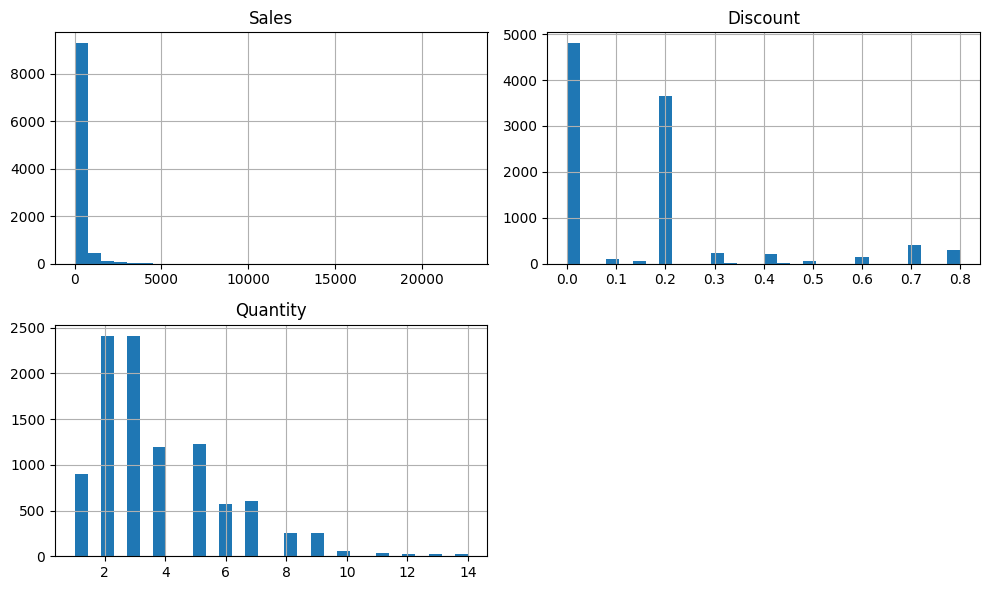

In [976]:
# Distribuições das variáveis contínuas
df[['Sales', 'Discount', 'Quantity']].hist(bins=30, figsize=(10, 6)) # Removido 'Profit'
plt.tight_layout()
plt.show()

# Remover a coluna "Profit" (APENAS se tudo estiver correto) - se precisares remover a coluna
# df.drop(['Profit'], axis='columns', inplace=True)
# print("Colunas após a remoção do 'Profit':", df.columns) #Verificar se removeu


#### Detecção de outliers com boxplots

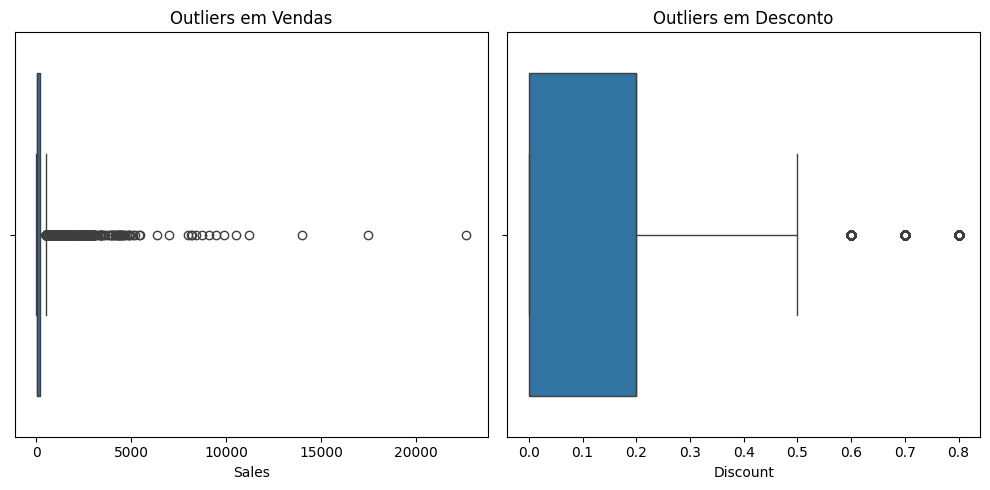

In [977]:
# Boxplot para detectar outliers
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Reduzir o número de subplots para 2
sns.boxplot(data=df, x='Sales', ax=axes[0])
# sns.boxplot(data=df, x='Profit', ax=axes[1])  # Remover a linha do "Profit"
sns.boxplot(data=df, x='Discount', ax=axes[1])  # Ajustar o índice para "Discount"
axes[0].set_title('Outliers em Vendas')
# axes[1].set_title('Outliers em Lucro')  # Remover o título do "Profit"
axes[1].set_title('Outliers em Desconto') # Ajustar o título para o desconto
plt.tight_layout()
plt.show()



### Visualizações estratégicas

####  Vendas por região, estado e categoria:

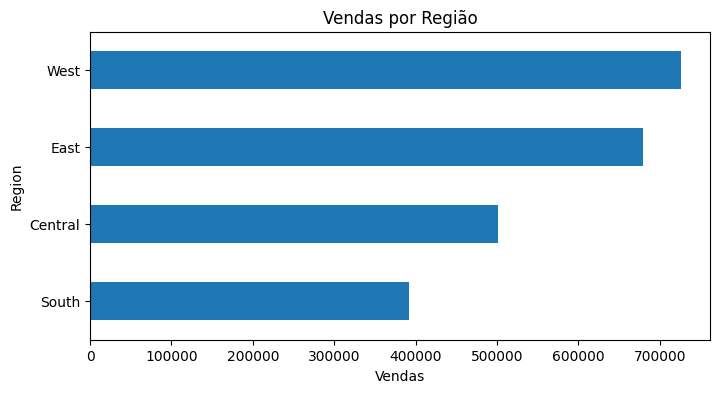

In [978]:
# Vendas por Região
df.groupby('Region')['Sales'].sum().sort_values().plot(kind='barh', title='Vendas por Região', figsize=(8,4))
plt.xlabel('Vendas')
plt.show()


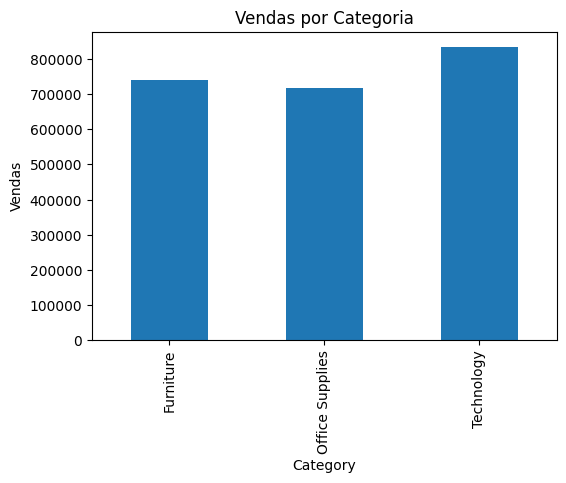

In [979]:
# Vendas por Categoria
df.groupby('Category')['Sales'].sum().plot(kind='bar', title='Vendas por Categoria', figsize=(6,4))
plt.ylabel('Vendas')
plt.show()


### Relação entre desconto e lucro:

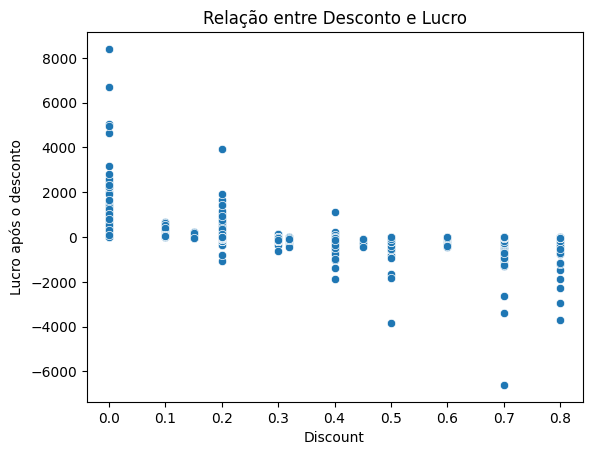

In [980]:
sns.scatterplot(data=df, x='Discount', y='Lucro após o desconto')
plt.title('Relação entre Desconto e Lucro')
plt.show()


### Lucro por categoria e subcategoria:

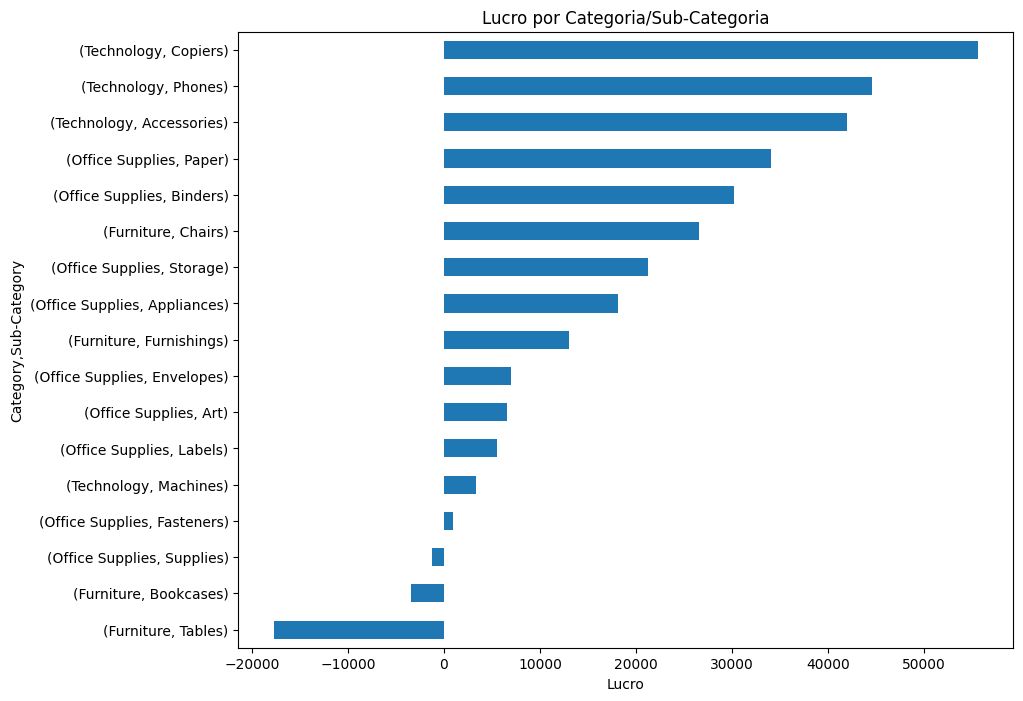

In [981]:
lucro_sub = df.groupby(['Category', 'Sub-Category'])['Lucro após o desconto'].sum().sort_values()
lucro_sub.plot(kind='barh', figsize=(10,8), title='Lucro por Categoria/Sub-Categoria')
plt.xlabel('Lucro')
plt.show()


### Evolução temporal de vendas e lucros:

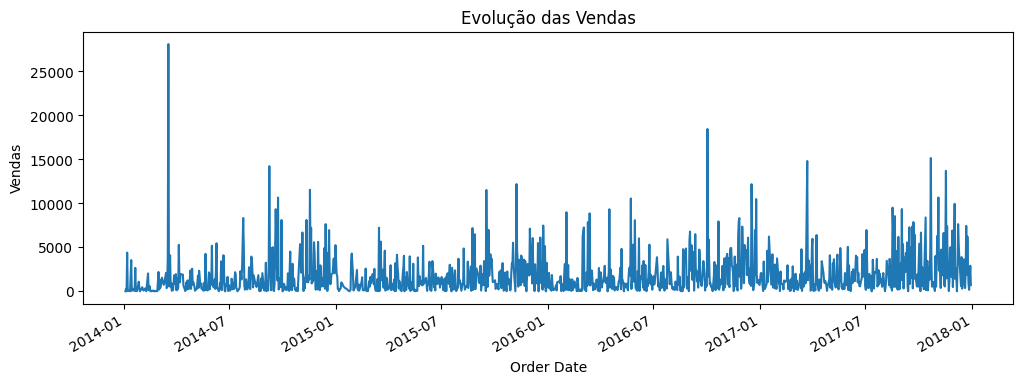

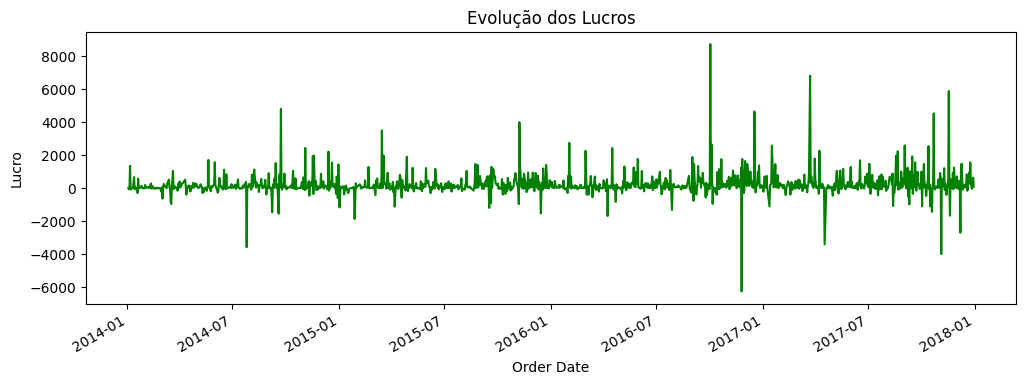

In [982]:
# Vendas ao longo do tempo
df.groupby('Order Date')['Sales'].sum().plot(figsize=(12,4), title='Evolução das Vendas')
plt.ylabel('Vendas')
plt.show()

# Lucros ao longo do tempo
df.groupby('Order Date')['Lucro após o desconto'].sum().plot(figsize=(12,4), title='Evolução dos Lucros', color='green')
plt.ylabel('Lucro')
plt.show()



### Mapa de calor de correlação:

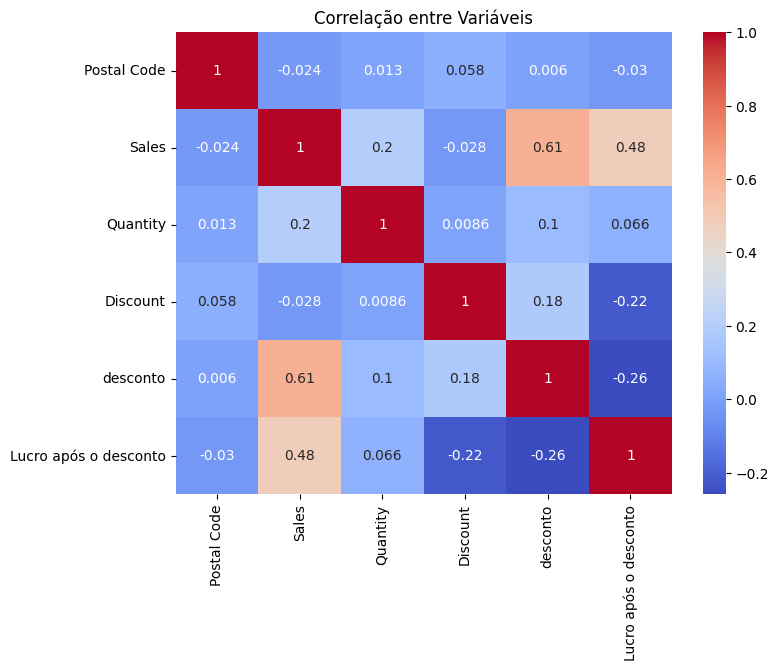

In [983]:
# Mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlação entre Variáveis')
plt.show()


In [984]:
# Criar um novo DataFrame a partir do df limpo
Superstore_dados_limpos = df.copy()

import os
from sqlalchemy import create_engine
from dotenv import load_dotenv

# Carregar variáveis do arquivo .env
load_dotenv()

user = os.getenv('USER')
password = os.getenv('PASSWORD')
host = os.getenv('HOST')
port = os.getenv('PORT')
database = os.getenv('DATABASE')

if not all([user, password, host, port, database]):
    raise ValueError("Uma ou mais variáveis de ambiente não foram carregadas corretamente.")

# Montar a string de conexão
connection_string = f'postgresql://{user}:{password}@{host}:{port}/{database}'

# Criar o engine
engine = create_engine(connection_string)

# Enviar o DataFrame para o PostgreSQL
Superstore_dados_limpos.to_sql(
    'Superstore_dados_limpos',
    engine,
    if_exists='replace',
    index=False
)
print("✅ DataFrame salvo no PostgreSQL na tabela 'Superstore_dados_limpos' com sucesso.")


C:\Users\lagma\AppData\Local\Temp\ipykernel_8388\1180200722.py:27: UserWarning: the 'timedelta' type is not supported, and will be written as integer values (ns frequency) to the database.
  Superstore_dados_limpos.to_sql(


✅ DataFrame salvo no PostgreSQL na tabela 'Superstore_dados_limpos' com sucesso.
